#Introducción
Este proyecto consiste en crear una Red Neuronal que pueda reconocer los numeros, para la realizacion de dicha red se crearon 300 imagenes de numeros, 30 imagenes por cada digito. 

Se aplicaron los conocimientos adquiridos a lo largo del curso de Verano.

#Equipo #1
Kevin Montaño Sánchez 1992332 IMTC

#Librerias
La primera parte consiste en importar librerías.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras


#Preprocesamiento
En esta sección se importan las imágenes, se reescalan y se dividen en grupo de entrenamiento y grupo de validación.

Para dividir el dataset se utilizo la funcion  train_test_split y se dividio en 80% para entrenamiento y 20% de validación, tambien se le dejo en claro que utilizara valores random.

In [ ]:
image_array = []
image_label = []

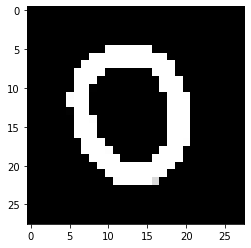

In [ ]:
file = '/content/drive/MyDrive/Numeros/9'

for images in glob.iglob(f'{file}/*'):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  image_array.append(img_resized)
  image_label.append(9)
plt.imshow(image_array[29], cmap='gray')


In [ ]:
len(image_array)

300

In [ ]:
ClassNames= ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
image_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [ ]:
len(image_label)

300

#Estructura y Entrenamiento
- Dividimos el DATASET EN 80 - 20
- Exploramos el set de datos
- Contruimos el modelo 
- Entrenamos el modelo
- Evaluamos su exactitud

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size=0.30, random_state=42)

In [ ]:
len(X_train)

210

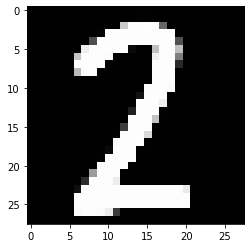

In [ ]:
plt.imshow(X_train[100], cmap='gray')

In [ ]:
print(y_train[100])

2


In [ ]:
X_train= np.array(X_train)
X_test= np.array(X_test)
y_test= np.array(y_test)
y_train= np.array(y_train)

In [ ]:
X_train.shape

(210, 28, 28)

In [ ]:
len(y_train)

210

In [ ]:
len(y_test)

90

In [ ]:
y_train

array([6, 3, 2, 7, 1, 0, 5, 4, 9, 2, 7, 2, 1, 6, 8, 7, 4, 0, 6, 3, 4, 8,
       2, 8, 8, 3, 4, 9, 6, 6, 1, 5, 6, 5, 4, 8, 1, 4, 6, 9, 4, 3, 5, 3,
       9, 9, 5, 5, 5, 0, 3, 4, 5, 4, 7, 8, 4, 2, 0, 2, 8, 3, 7, 5, 9, 8,
       7, 2, 6, 2, 7, 5, 0, 1, 0, 4, 9, 8, 5, 1, 3, 6, 8, 1, 2, 8, 4, 0,
       9, 4, 6, 0, 8, 9, 3, 8, 8, 5, 3, 1, 2, 5, 7, 6, 8, 0, 9, 8, 0, 7,
       0, 4, 1, 6, 5, 6, 9, 4, 2, 4, 4, 9, 0, 2, 8, 2, 1, 9, 5, 1, 4, 9,
       7, 5, 0, 8, 3, 2, 6, 7, 1, 8, 9, 8, 6, 0, 1, 3, 8, 7, 9, 6, 5, 1,
       7, 4, 6, 7, 8, 0, 3, 1, 4, 0, 4, 3, 1, 2, 6, 1, 3, 1, 8, 0, 2, 5,
       9, 4, 9, 8, 1, 1, 5, 6, 9, 6, 5, 1, 1, 7, 8, 0, 5, 9, 6, 8, 4, 4,
       5, 3, 2, 7, 4, 9, 0, 6, 2, 3, 9, 3])

In [ ]:
X_test.shape

(90, 28, 28)

In [ ]:
len(y_test)

90

In [ ]:
# Normalización de valores de pixeles.

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 2.3186 - accuracy: 0.1381
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 1.5917 - accuracy: 0.6762
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 1.1111 - accuracy: 0.8143
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.7813 - accuracy: 0.8810
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.9286
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3917 - accuracy: 0.9476
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.9571
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2135 - accuracy: 0.9810
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.1632 - accuracy: 0.9905
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.1319 - accuracy: 0.9905


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.4183 - accuracy: 0.8889 - 175ms/epoch - 58ms/step

Test accuracy: 0.8888888955116272


# Prediciones y Graficas

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0]

array([6.6765775e-03, 1.2739050e-02, 1.8904669e-02, 6.4535218e-04,
       6.6965655e-03, 4.5538422e-02, 8.1704122e-01, 2.3619334e-04,
       9.1194943e-02, 3.2696719e-04], dtype=float32)

In [ ]:
np.argmax(predictions[0])

6

In [ ]:
y_test[0]

6

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(ClassNames[predicted_label],
                                100*np.max(predictions_array),
                                ClassNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

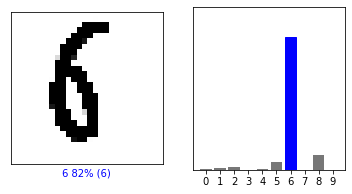

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

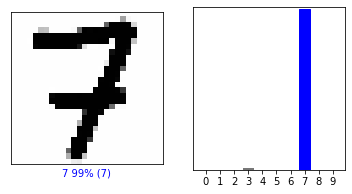

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

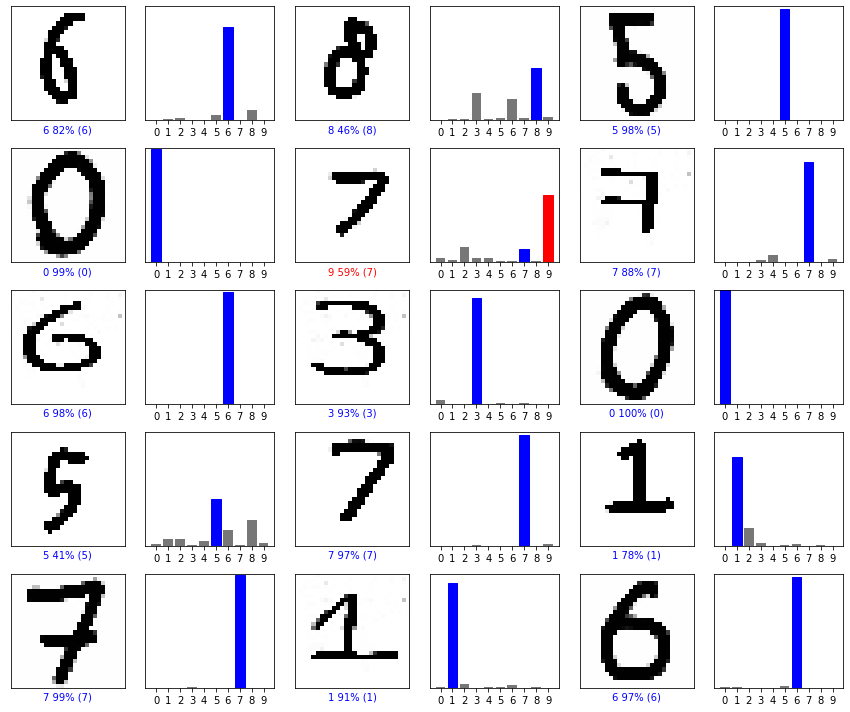

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# Resultado
Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.



In [ ]:

img = X_test[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.00419354 0.01611174 0.00856355 0.23709242 0.01145511 0.02173767
  0.18804397 0.02549925 0.45655513 0.03074761]]


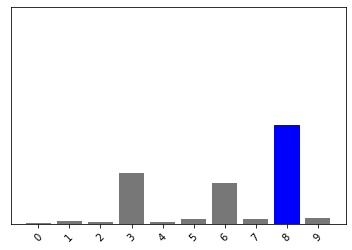

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), ClassNames, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

8

___________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Comentarios

**La parte del aprendizaje de dicha Red esta basada en un codigo ya estipulado y con sus respectivas licencias y derechos de autor.**



MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a
copy of this software and associated documentation files (the "Software"),
to deal in the Software without restriction, including without limitation
the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following conditions:
#
The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.
#
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
DEALINGS IN THE SOFTWARE.

# Referencias

1.- https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

2.- https://www.tensorflow.org/tutorials/images/cnn?hl=es-419